In [46]:
#Source code is created by Pulung Hendro Prastyo
#February,17,2020
#Universitas Gadjah Mada, Faculty of Engineering, Department of Electrical and Information Technology Engineering

#Note: this code still needs improvement to get the value of imadjust correctly, 

#Import lib open-cv, Numpy, and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

In [47]:
# make imadjust function to enhance an image contrast

def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y


# make GGB color space based on a GGB algorithm from 
#paper "Development of a robust algorithm for detection of nuclei of white blood cells in peripheral blood smear images"

def rgb2ggb(image):

    #image = cv2.imread('blood.png')
    
    #2. Separate R,G, and B components
    """
    b = image[:,:,0:1]
    g = image[:,:,1:2]
    r = image[:,:,2:3]
    """
    b,g,r = cv2.split(image)
    arr = np.asarray(image)
    
    #3. Normalize G companent to obtain Gn using the relation Gn= G/Gmean
    #where Gmean is the mean value of G component
    gmean = np.array(g).mean(axis=(0,1))
    gn=g/gmean
    
    alpha = 1 # Contrast control (1.0-3.0)
    beta = 0 # Brightness control (0-100)
    #clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    #g_aksen = clahe.apply(gn)
    #g_aksen= cv2.convertScaleAbs(gn, alpha=alpha, beta=beta)
    #g_aksen=imadjust(gn,arr.min(),arr.max(),0,1)
    #g_aksen = cv2.addWeighted(gn, 2, np.zeros(image.shape, image.dtype), 0, 50)
    #g_aksen = cv2.equalizeHist(gn)
    
    brightness=1
    contrast =1
    g_aksen = gn*(contrast/127+1) - contrast + brightness
    
    #4. Contrast enhance Gn to obtain G' using imadjust function of Matlab
    
    #5. Normalize B component to obtain Bn using the relation Bn=B/Bmean,
    #where Bmean is the mean value of B component
    bmean = np.array(g).mean(axis=(0,1))
    bn=b/bmean
    
    #6 Combine G', G', Bn to obtain GGB
    result = cv2.merge((g_aksen,g_aksen,bn))
   
    plt.title("Original Image")
    plt.imshow(image)
    plt.show()
 
    plt.title("GGB Image")
    plt.imshow(result)
    plt.show()
    


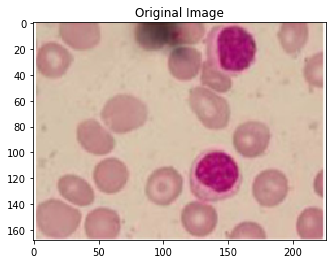

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


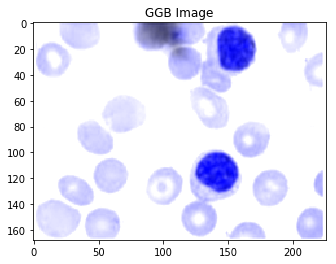

In [48]:
# Firstly, we have to change color space using skimage.io.imread  to load image as RGB (or RGBA) 
#Because OpenCV assumes the image to be BGR or BGRA (BGR is the default OpenCV colour format)

#First Image
img = skimage.io.imread('blood.png')
cv2.imwrite('blood_1.png', img)
image = cv2.imread('blood_1.png')
rgb2ggb(image)



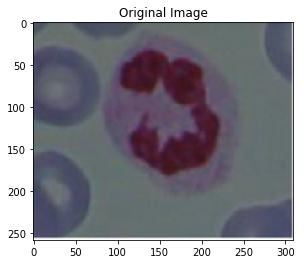

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


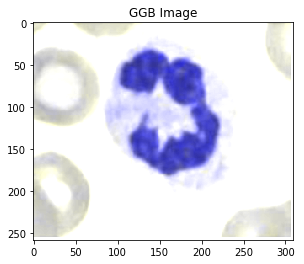

In [56]:
#second Image
img = skimage.io.imread('blood3.png')
cv2.imwrite('blood3_1.png', img)
image = cv2.imread('blood3.png')
rgb2ggb(image)

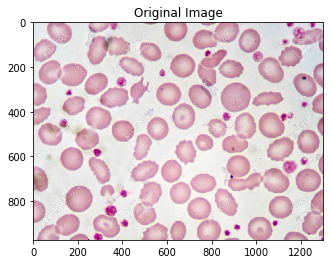

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


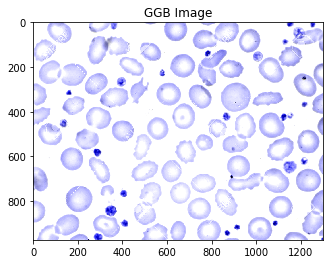

In [50]:
#Third Image
img = skimage.io.imread('smear.jpg')
cv2.imwrite('smear_1.png', img)
image = cv2.imread('smear_1.png')
plt.show()
rgb2ggb(image)

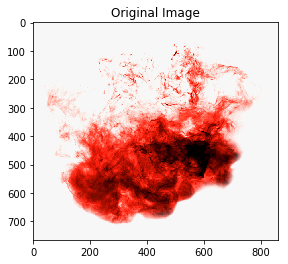

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


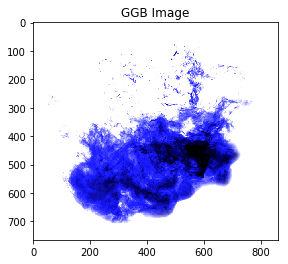

In [40]:
#Fourth Image
img = skimage.io.imread('red.png')
cv2.imwrite('red_1.png', img)
image = cv2.imread('red_1.png')
plt.show()
rgb2ggb(image)

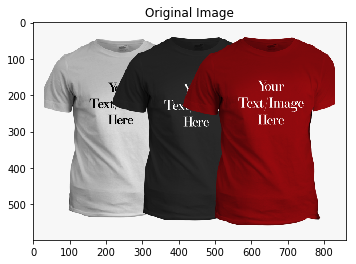

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


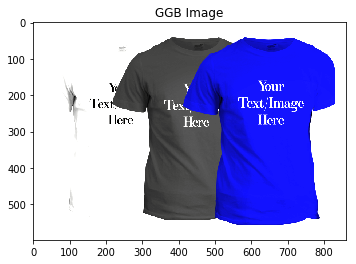

In [41]:
#Fifth Image

img = skimage.io.imread('shirt.png')
cv2.imwrite('shirt_1.png', img)
image = cv2.imread('shirt_1.png')
plt.show()
rgb2ggb(image)

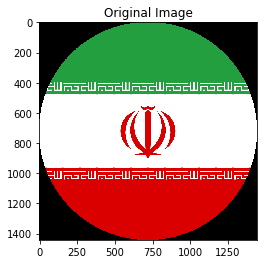

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


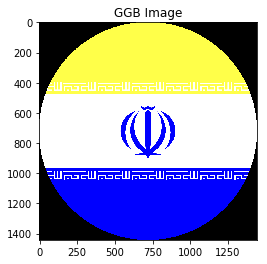

In [43]:
#Sixth Image

img = skimage.io.imread('flag.png')
cv2.imwrite('flag_1.png', img)
image = cv2.imread('flag_1.png')
plt.show()
rgb2ggb(image)

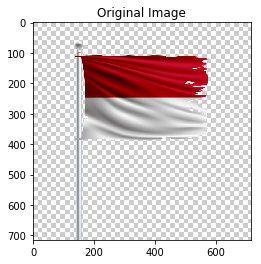

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


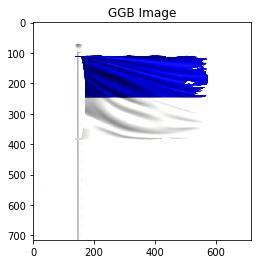

In [58]:
#Eighth Image
img = skimage.io.imread('indonesia.jpg')
cv2.imwrite('indonesia_1.png', img)
image = cv2.imread('indonesia_1.png')
plt.show()
rgb2ggb(image)